In [20]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image

In [11]:
from utils import label_map_util

from utils import visualization_utils as vis_util

utils/visualization_utils.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 107

In [9]:
# This is needed to display the images.
%matplotlib inline

In [ ]:
# corpus [[(0, 4),(id, counts),  ]...]
# id2word {id:'name', 0: u'name 1',}
# labels [0,1,2,2...] int
# label2name {0: showname} string
# od_inference_dirs ['od_3438636448_1fps'...] string
# model = LdaModel(
#     corpus=corpus,
#     id2word=id2word,
#     chunksize=chunksize,
#     alpha='auto',
#     eta='auto',
#     iterations=iterations,
#     num_topics=num_topics,
#     passes=passes,
#     eval_every=eval_every
# )

In [10]:
od_inference_dirs = ['od_1252812627_1fps', 'od_1252812923_1fps', 'od_169182094_1fps', 'od_169182098_1fps', 'od_279703428_1fps', 'od_279703885_1fps', 'od_942334491_1fps', 'od_942334494_1fps', 'od_3438636448_1fps', 'od_3477876483_1fps', 'od_3423612893_1fps', 'od_3497684122_1fps', 'od_3498539801_1fps', 'od_3498532459_1fps', 'od_3491078546_1fps', 'od_3582306776_1fps', 'od_3468314939_1fps']

labels = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11]

label2name = {0:'Game of Throne', 1: 'Friends', 2: 'Sopranos', 3: 'Breaking Bad', 4: 'Africa\'s Hunters', 5: 'Africa\'s Wild', 6: 'Big Bang Theory', 7: '16 and Pregnant', 8: 'Teen Mom', 9: '4th & Forever', 20: '24/7 College', 11: 'Camelot'}

In [12]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
NUM_CLASSES = 547

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [13]:
with open('/root/openimage/f_score_v5.pickle', 'rb') as handle:
    maxF_dict = pickle.load(handle)

In [16]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict

def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
            if prob > maxF_dict[c]['Threshold']:
                class_counts[c] += 1
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path=''):
    results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
    for elem in listofTuples[0:topN] :
#         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
        print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))




In [18]:
results = {}

ID,frequency (%),Name
47,20.42,Arm
37,15.27,Hair
32,10.21,Human body
2,8.96,Clothing
39,8.68,Head
45,5.52,Mammal
7,4.86,Woman
1,3.87,Person
12,3.03,Girl
3,2.82,Man
4,2.61,Face
23,1.76,Table
29,1.29,Dress
18,0.98,Furniture
103,0.95,Couch
55,0.93,Nose
6,0.62,Plant
62,0.53,Eye
64,0.46,Mouth
9,0.45,Building


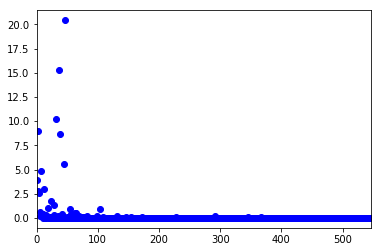

In [21]:
od_dir = 'od_169182098_1fps' #f2
results[od_dir] = {}
results[od_dir]['Raw'] = read_frames_todict('/root/ampvideo_inference/'+od_dir)
results[od_dir]['Words'] = calculate_words(results[od_dir]['Raw'], NUM_CLASSES, maxF_dict)
plot_class(od_dir, results, NUM_CLASSES,20)